In [4]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt 
import shap
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [5]:
wine1 = load_wine()
x = pd.DataFrame(wine1.data,columns=wine1.feature_names)
y= wine1.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [6]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [7]:
rf.feature_importances_

array([7.52196625e-02, 9.47075926e-04, 3.40466374e-03, 4.41816490e-03,
       5.12416436e-03, 7.53353072e-03, 2.63182707e-01, 3.64865853e-04,
       2.49124955e-03, 9.16019977e-02, 1.25285097e-02, 4.11412383e-01,
       1.21771025e-01])

In [8]:
rf.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

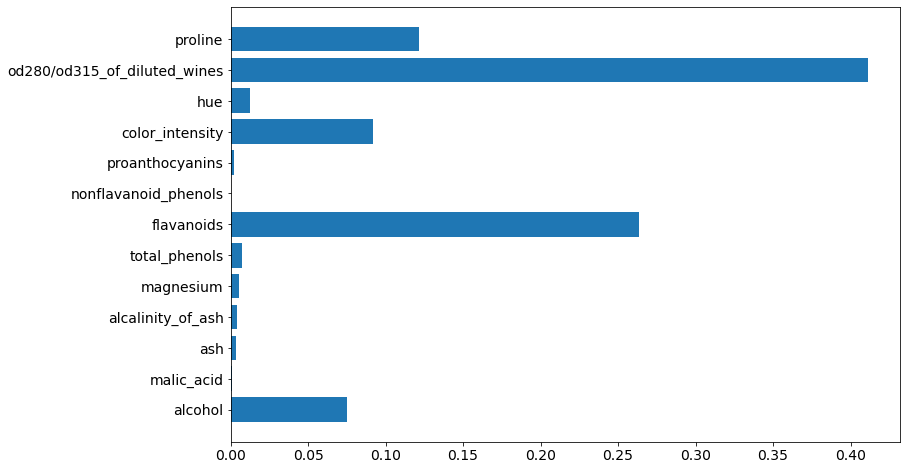

In [11]:
plt.barh(wine1.feature_names,rf.feature_importances_)
plt.show()
plt.rcParams.update({'figure.figsize':(12.0,8.0)})
plt.rcParams.update({'font.size':14})

In [12]:
explainer = shap.TreeExplainer(rf)
shap_values= explainer.shap_values(x_test)

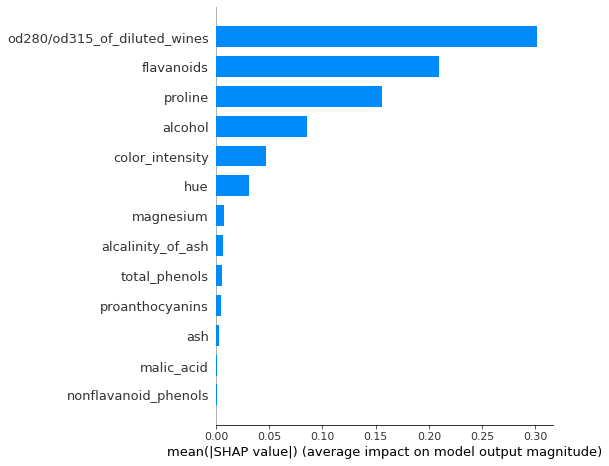

In [13]:
shap.summary_plot(shap_values,x_test,plot_type='bar')

In [14]:
xgb1 = XGBClassifier(n_estimators=100,learning_rate=0.05)

In [15]:
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [17]:
xgb1.get_booster().get_score(importance_type='gain')

{'alcohol': 0.246333509683609,
 'malic_acid': 0.14245370030403137,
 'ash': 0.35504576563835144,
 'alcalinity_of_ash': 0.11492928117513657,
 'magnesium': 0.630746066570282,
 'total_phenols': 0.1626306176185608,
 'flavanoids': 2.937572956085205,
 'nonflavanoid_phenols': 0.09997540712356567,
 'proanthocyanins': 0.21257904171943665,
 'color_intensity': 4.018352508544922,
 'hue': 0.5344120264053345,
 'od280/od315_of_diluted_wines': 13.330885887145996,
 'proline': 3.6996867656707764}